In [137]:
import configparser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

config = configparser.ConfigParser()
config.read('../../config.ini')

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [138]:
data_train = pd.read_csv(config['paths']['train'],  parse_dates=['date'])
data_test = pd.read_csv(config['paths']['test'])
data_sample = pd.read_csv(config['paths']['sample_sub'])
data_stores = pd.read_csv(config['paths']['stores'])
data_oil = pd.read_csv(config['paths']['oil'], parse_dates=['date'])
data_holidays = pd.read_csv(config['paths']['holidays'], parse_dates=['date'])
data_trans = pd.read_csv(config['paths']['transactions'], parse_dates=['date'])

In [139]:
data_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [140]:
data_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [141]:
data_trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [142]:
data_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# ISNA

In [143]:
data_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [144]:
data_train['date'] = pd.to_datetime(data_train['date'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


<AxesSubplot:xlabel='date'>

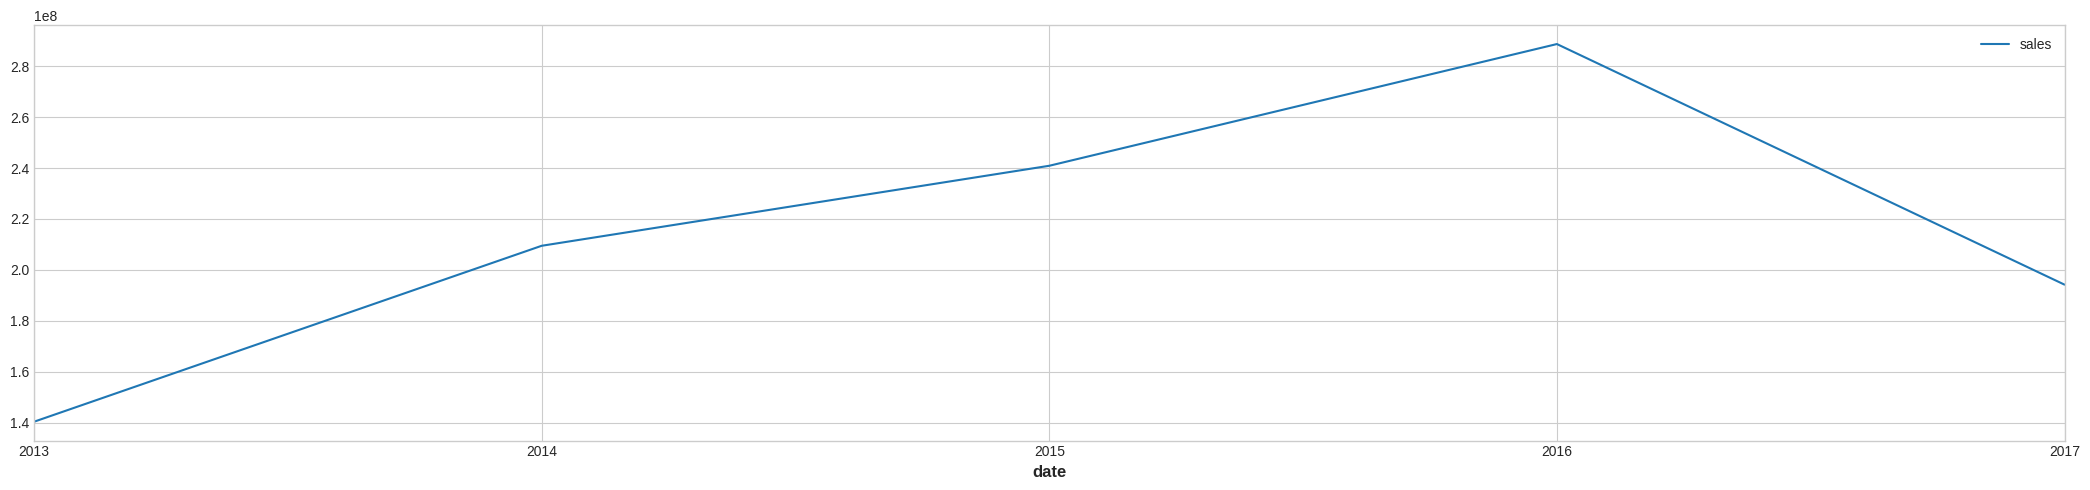

In [145]:
# Total Yearly sales Favorita Co.
(
    data_train.loc[:, ['date', 'sales']]
    .set_index('date')
    .to_period('D')
    .resample('1Y')
    .sum()
    .plot(figsize=(21,5))
)

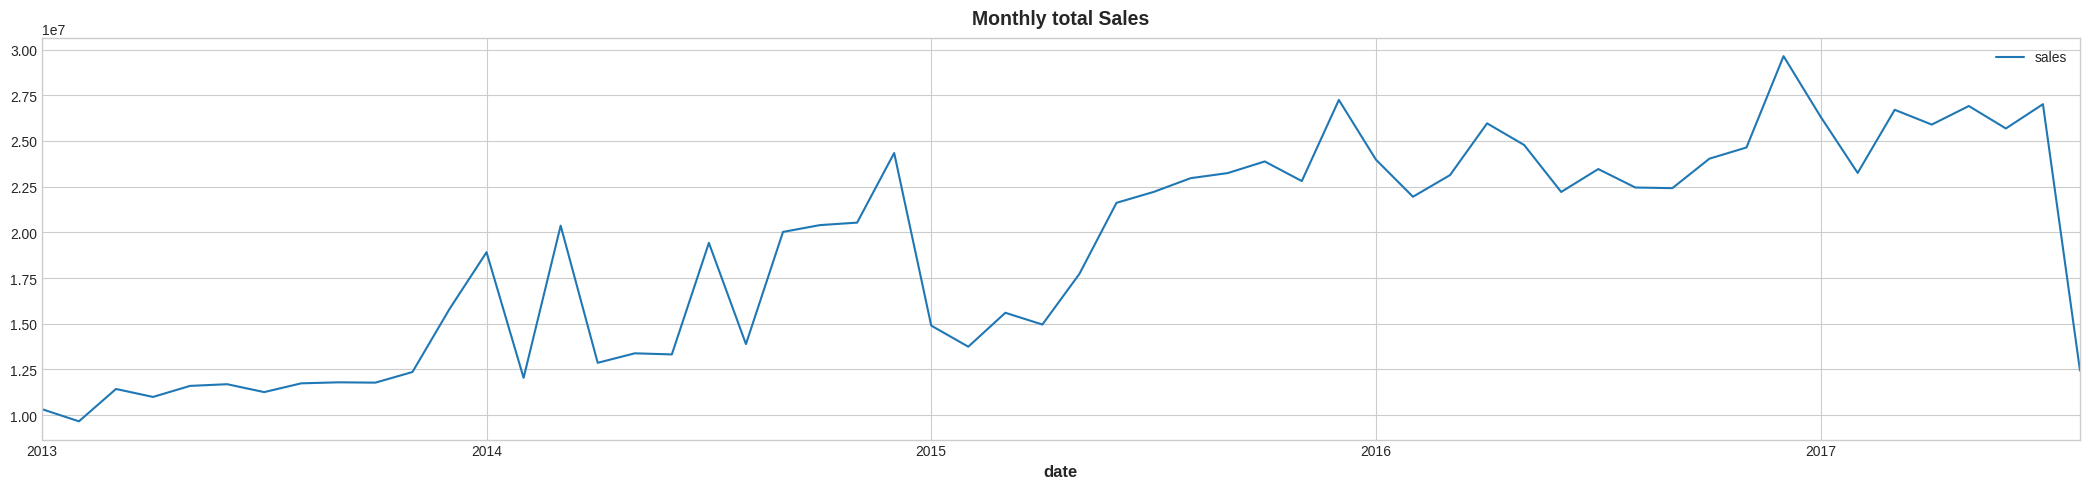

In [146]:
# Total Monthly sales Favorita Co.
(
    data_train
    .loc[:,['date', 'sales']]
    .set_index('date')
    .to_period('D')
    .resample('1M')
    .sum()
    .plot(figsize=(21,5))
)

plt.title('Monthly total Sales')
plt.show()

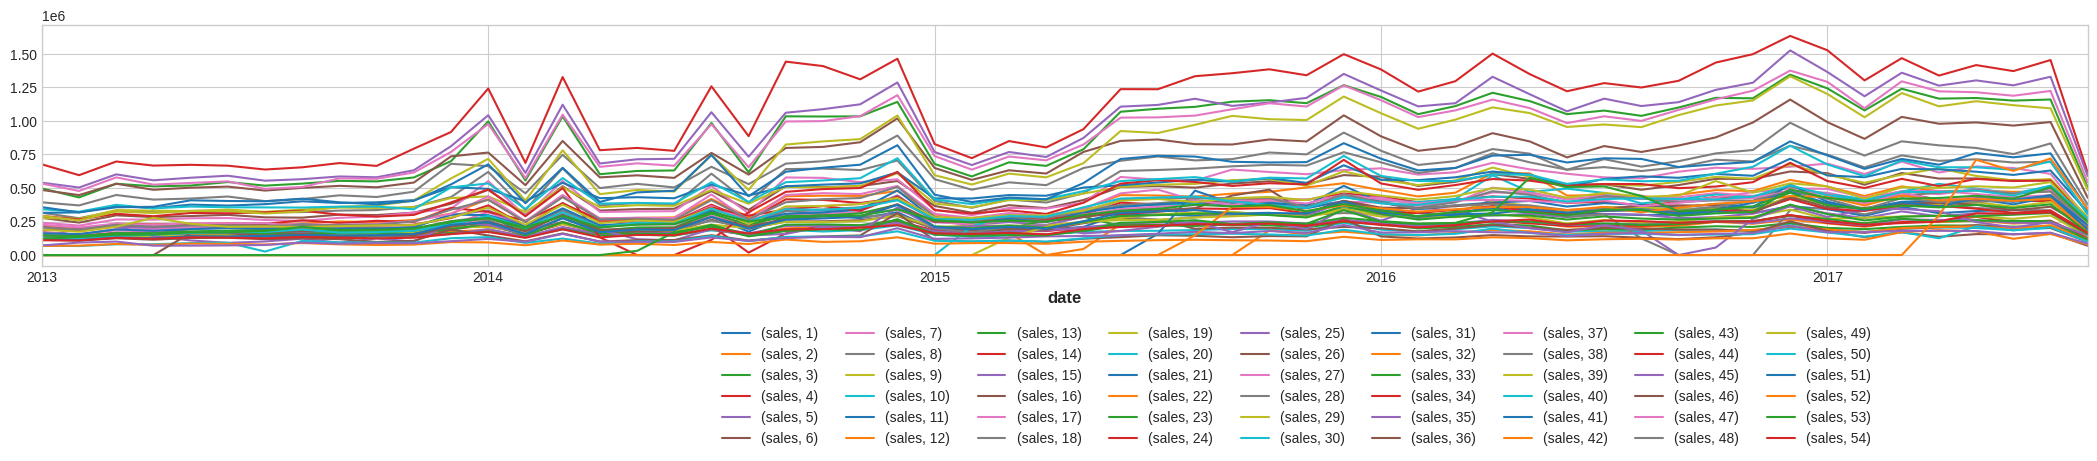

In [147]:
# Monthly total sales per store
sales_per_store = (
    data_train
    .groupby(['date','store_nbr'])
    .agg({'sales':'sum'})
    .unstack()
    .resample('1M')
    .sum()
)

sales_per_store.plot(figsize=(21,5))
plt.legend(bbox_to_anchor = (0.9, -0.2), ncol=9)
plt.show()

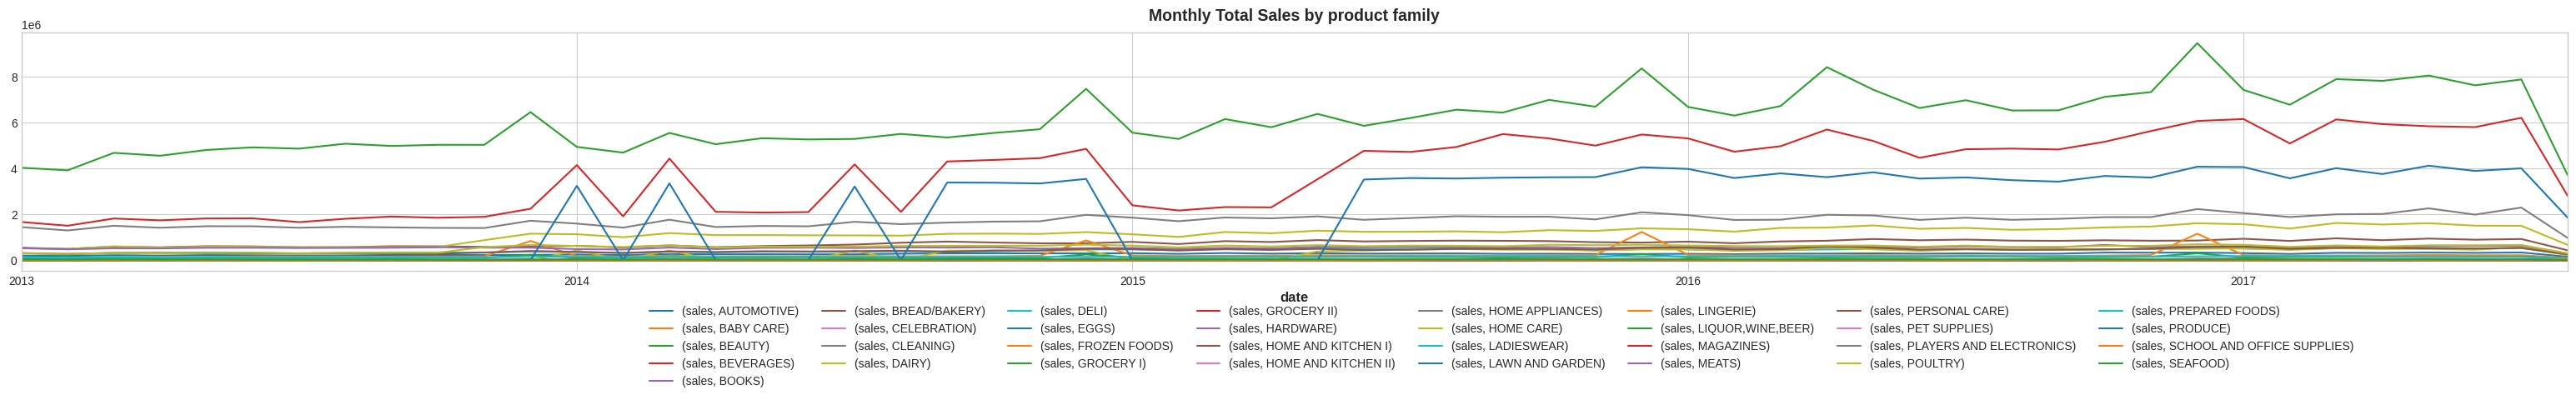

In [148]:
# Monthly total sales per product family
(
    data_train.loc[:, ['date', 'family', 'sales']]
    .groupby(['date','family'])
    .agg({'sales':'sum'})
    .unstack()
    .resample('1M')
    .sum()
    .plot(figsize=(31,5))
)

plt.legend(bbox_to_anchor = (0.92, -0.1), ncol=8)
plt.title('Monthly Total Sales by product family')
plt.show()

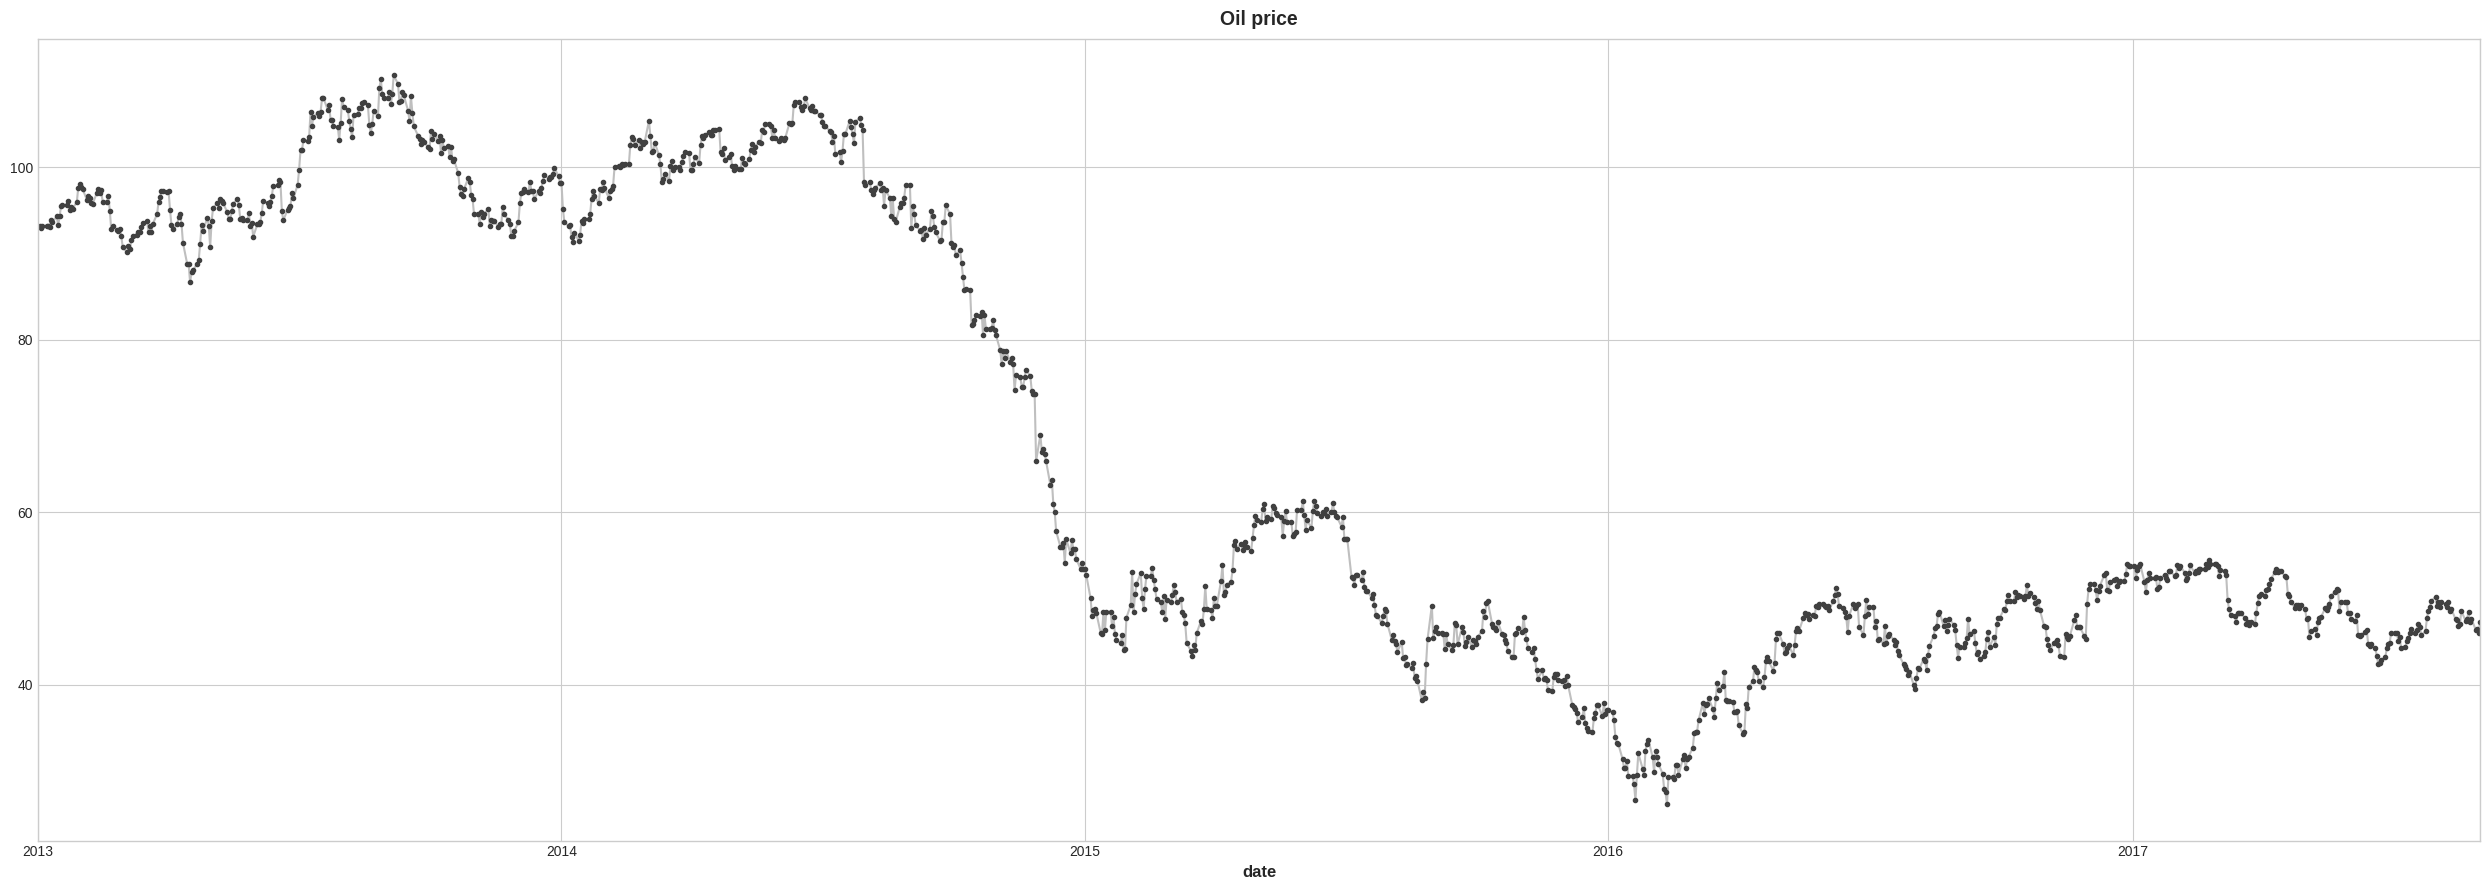

In [152]:
# Oil price

(
    data_oil
    .fillna(method='ffill')
    .set_index('date')
    .to_period('D')
    .plot(figsize=(25,9), **plot_params)
)

plt.title('Oil price')
plt.show()

In [20]:
data_train['sales2'] = np.log1p(data_train['sales'])
data_train

,id,date,store_nbr,family,sales,onpromotion,sales2
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,0.000000
1,1,2013-01-01,1,BABY CARE,0.000,0,0.000000
2,2,2013-01-01,1,BEAUTY,0.000,0,0.000000
3,3,2013-01-01,1,BEVERAGES,0.000,0,0.000000
4,4,2013-01-01,1,BOOKS,0.000,0,0.000000
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,6.084802
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,5.046987
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,7.791824
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,4.804021
